# 도전 과제 : 영화 리뷰 감성 분석
---
## 1. 데이터셋 불러오기
- DataFrame을 정상적으로 불러오고, 대략적인 정보를 표시했는가?
  - 달성 기준: head, tail, columns, shape를 출력

In [2]:
# 1 데이터셋 불러오기
import pandas as pd

df = pd.read_csv("netflix_reviews.csv")

# shape  : 행과 열의 개수를 튜플로 반환
print("Shape of dataset :",df.shape)

print("Columns in the dataset : ",df.columns)

Shape of dataset : (117292, 8)
Columns in the dataset :  Index(['reviewId', 'userName', 'content', 'score', 'thumbsUpCount',
       'reviewCreatedVersion', 'at', 'appVersion'],
      dtype='object')


In [3]:
# head() : 상단 5개 데이터
df.head()

,reviewId,userName,content,score,thumbsUpCount,reviewCreatedVersion,at,appVersion
0,65ae4898-8007-47e3-92cd-ba06eac04574,Moosa Sam (Moosa Sam),This App Not Supporting My Device ROG3 Mobile!...,1,0,8.137.0 build 4 50942,2024-10-23 13:47:33,8.137.0 build 4 50942
1,3cc99dd8-81f1-47ce-8b78-18c29719a941,PixEndstar53,"I'm getting very tired, you guys keep logging ...",2,0,8.137.0 build 4 50942,2024-10-23 13:27:18,8.137.0 build 4 50942
2,1c639697-a825-4f11-b966-3e7cfb6eb292,JanCan1 GK,One of my go to channels..l was at least 4 mov...,5,0,8.132.2 build 18 50846,2024-10-23 13:26:51,8.132.2 build 18 50846
3,240cfd35-f94d-42d6-b145-154097dd2ce0,Brother Bear,"Poor scripts, Violent content",2,0,NaN,2024-10-23 13:19:59,NaN
4,c568b9f0-7b52-4dad-9b89-f57882014138,Riya Adak,Good,3,0,8.137.0 build 4 50942,2024-10-23 13:16:59,8.137.0 build 4 50942


In [4]:
# tail() : 하단 5개 데이터
df.tail()

,reviewId,userName,content,score,thumbsUpCount,reviewCreatedVersion,at,appVersion
117287,a760ead9-e7aa-4ed1-a651-5c37c3600dac,A Google user,i really like it! there are so many movies and...,5,0,NaN,2019-08-03 15:06:03,NaN
117288,4957f9e7-d7f4-4a52-9764-031cebcac83f,Captain Jeoy,I love Netflix. I always enjoy my time using it.,5,0,8.34.0 build 4 50250,2022-08-15 16:16:30,8.34.0 build 4 50250
117289,9acf7586-7abf-4b50-8c50-3ede3b2a42c4,Suryansh,Sound quality is very slow of movies,1,0,NaN,2020-08-17 07:26:58,NaN
117290,32870f7f-c461-4256-b602-75244ca60248,A Google user,Rate is very expensive.. bcos we see netflix s...,1,0,7.17.0 build 13 34346,2019-07-21 09:41:42,7.17.0 build 13 34346
117291,dc1352e9-10a8-41ca-ab23-05d045b08e90,suraj soni,"this app is awesome for english movies ,series...",4,0,NaN,2020-05-24 11:04:08,NaN


# 2. 데이터 전처리
- 텍스트 전처리를 lambda를 활용하여 완료했는가?
  - 달성 기준: apply 사용하여, 텍스트 전처리 완료

In [5]:
# describe() 로 분석
df.describe()

,score,thumbsUpCount
count,117292.000000,117292.000000
mean,2.818837,10.150599
std,1.704934,99.759861
min,1.000000,0.000000
25%,1.000000,0.000000
50%,3.000000,0.000000
75%,5.000000,1.000000
max,5.000000,8032.000000


In [6]:
# 결측치 확인
df.isnull().sum()

reviewId                    0
userName                    2
content                     2
score                       0
thumbsUpCount               0
reviewCreatedVersion    17584
at                          0
appVersion              17584
dtype: int64

In [7]:
df[df['content'].isnull()] # content의 결측치 확인

,reviewId,userName,content,score,thumbsUpCount,reviewCreatedVersion,at,appVersion
7608,a73c931f-5cce-4863-b1ae-40101455f137,Maria Wiley,NaN,5,0,8.114.0 build 19 50680,2024-05-21 16:56:29,8.114.0 build 19 50680
7959,839d55ed-ba9e-4753-a178-5799b9f86ffc,Myris Guilanda,NaN,2,0,NaN,2024-05-19 13:52:42,NaN


* content는 영화 리뷰 감성 분석에 영향을 미치는 데이터이므로 점수와 맞게 처리하기
  * 예) 5점이면 good, 2점이면 bad

In [8]:
import re
def preprocess_text(text):
    
    if isinstance(text,float): # Pandas 에서 결측값(NaN)은 float 로 처리되므로 NaN 값 처리
        return ""
    '''
    df['content'] = df['content'].fillna(
    df['score'].replace({ # replace() 메서드로 점수에 해당하는 문자열로 매핑 --> 하려했으나 로딩?너무 오래걸려서 그냥 결측값 없애는걸로
        5: 'Excellent!',
        4: 'Good!',
        3: 'Average.',
        2: 'Could be better.',
        1: 'Terrible!'
    })
    )
    '''
    text = text.lower()
    text = re.sub(r'[^\w\s]','',text) # text 중 문자+띄어쓰기를 제외한 모든것을 없앰
    text = re.sub(r'\d+','',text) # text 중 숫자가 하나 이상인 것 제거
    text = text.strip() # .strip() : 문자열 앞,뒤 공백 제거
    return text

In [9]:
# lambda 함수를 사용하여 content 열 전처리
df['content'] = df['content'].apply(lambda x: preprocess_text(x))

In [10]:
# 결측치 재확인
df.isnull().sum()

reviewId                    0
userName                    2
content                     0
score                       0
thumbsUpCount               0
reviewCreatedVersion    17584
at                          0
appVersion              17584
dtype: int64

## 3. feature 분석 (EDA)
-   리뷰의 평점 분포를 그래프로 표시했는가?
    -  달성 기준: seaborn과 matplotlib를 정상적으로 사용

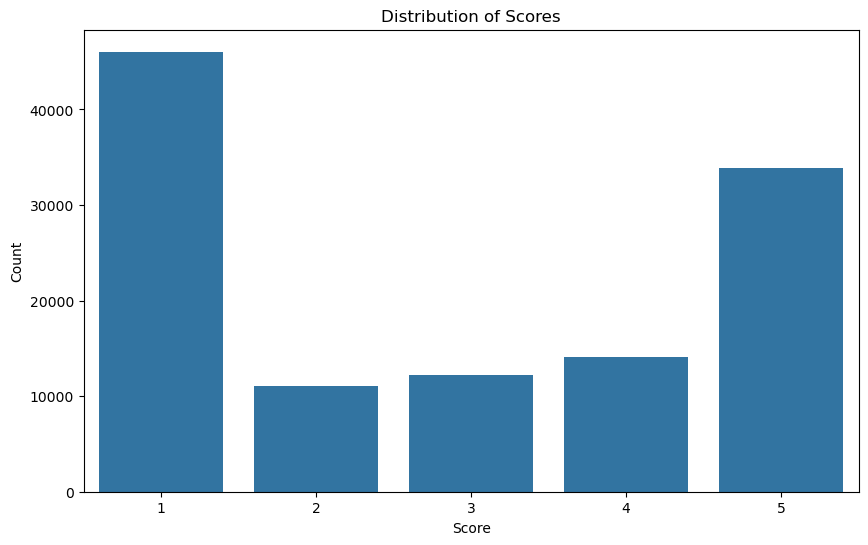

In [11]:
import seaborn as sns  # 그래프를 그리기 위한 seaborn 라이브러리 임포트
import matplotlib.pyplot as plt  # 그래프 표시를 위한 pyplot 임포트

# 점수별 리뷰 개수 계산
score_counts=df['score'].value_counts().reset_index() # 값의 빈도 계산
score_counts.columns=['score','review_count']

# 리뷰 평점 분포 그래프 그리기
plt.figure(figsize=(10,6)) # plt.figure(figsize=(가로크기,세로크기))
sns.barplot(data=score_counts, x='score', y='review_count') # sns.barplot(x=x축카테고리,y=y축카테고리)
plt.xlabel('Score')
plt.ylabel('Count')
plt.title('Distribution of Scores')
plt.show()

## 4. 리뷰 예측 모델 학습시키기 (LSTM)
-  리뷰 예측 모델을 성공적으로 학습시키고 예측 결과를 표시했는가?
   - 달성 기준: LSTM 모델을 설계했으면 달성

In [17]:
import torch

In [21]:
import torchtext

OSError: dlopen(/opt/anaconda3/envs/welcometodl/lib/python3.10/site-packages/torchtext/lib/libtorchtext.so, 0x0006): Symbol not found: __ZN3c105ErrorC1ENSt3__112basic_stringIcNS1_11char_traitsIcEENS1_9allocatorIcEEEES7_PKv
  Referenced from: <8349B302-A1C9-3870-AB5A-21A14A352BC2> /opt/anaconda3/envs/welcometodl/lib/python3.10/site-packages/torchtext/lib/libtorchtext.so
  Expected in:     <BA9C42A5-EA1D-3784-80E1-73FBFDE05847> /opt/anaconda3/envs/welcometodl/lib/python3.10/site-packages/torch/lib/libc10.dylib

In [16]:
import pandas as pd
import torch
import torch.nn as nn
import torch.optim as optim
from torchtext.data.utils import get_tokenizer
from torchtext.vocab import build_vocab_from_iterator
from torch.utils.data import DataLoader, Dataset
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
import numpy as np


# 데이터셋 클래스 정의
class ReviewDataset(Dataset):
    def __init__(self, reviews, ratings, text_pipeline, label_pipeline):
        self.reviews = reviews
        self.ratings = ratings
        self.text_pipeline = text_pipeline
        self.label_pipeline = label_pipeline

    def __len__(self):
        return len(self.reviews)

    def __getitem__(self, idx):
        review = self.text_pipeline(self.reviews[idx])
        rating = self.label_pipeline(self.ratings[idx])
        return torch.tensor(review), torch.tensor(rating)

# 데이터셋 정의
train_dataset = ReviewDataset(train_reviews, train_ratings, text_pipeline, label_pipeline)
test_dataset = ReviewDataset(test_reviews, test_ratings, text_pipeline, label_pipeline)

# 데이터 로더 정의
BATCH_SIZE = 64

train_dataloader = DataLoader(train_dataset, batch_size=BATCH_SIZE, shuffle=True)
test_dataloader = DataLoader(test_dataset, batch_size=BATCH_SIZE, shuffle=False)

# LSTM 모델 정의
class LSTMModel(nn.Module):
    def __init__(self, vocab_size, embed_dim, hidden_dim, output_dim):
        super(LSTMModel, self).__init__()
        self.embedding = nn.EmbeddingBag(vocab_size, embed_dim, sparse=True)
        self.lstm = nn.LSTM(embed_dim, hidden_dim, batch_first=True)
        self.fc = nn.Linear(hidden_dim, output_dim)

    def forward(self, text):
        embedded = self.embedding(text)
        output, (hidden, cell) = self.lstm(embedded.unsqueeze(0))
        return self.fc(hidden[-1])

# 하이퍼파라미터 정의
VOCAB_SIZE = len(vocab)
EMBED_DIM = 64
HIDDEN_DIM = 128
OUTPUT_DIM = len(set(ratings))  # 예측할 점수 개수

# 모델 초기화
model = LSTMModel(VOCAB_SIZE, EMBED_DIM, HIDDEN_DIM, OUTPUT_DIM)

# 손실 함수와 옵티마이저 정의
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(model.parameters(), lr=0.01)

# 모델 학습은 직접 작성해보세요!!!

# 예측 함수(예시)
def predict_review(model, review):
    model.eval()
    with torch.no_grad():
        tensor_review = torch.tensor(text_pipeline(review))
        output = model(tensor_review)
        prediction = output.argmax(1).item()
        return label_encoder.inverse_transform([prediction])[0]

# 새로운 리뷰에 대한 예측
new_review = "This app is great but has some bugs."
predicted_score = predict_review(model, new_review)
print(f'Predicted Score: {predicted_score}')

OSError: dlopen(/opt/anaconda3/envs/welcometodl/lib/python3.10/site-packages/torchtext/lib/libtorchtext.so, 0x0006): Symbol not found: __ZN3c105ErrorC1ENSt3__112basic_stringIcNS1_11char_traitsIcEENS1_9allocatorIcEEEES7_PKv
  Referenced from: <8349B302-A1C9-3870-AB5A-21A14A352BC2> /opt/anaconda3/envs/welcometodl/lib/python3.10/site-packages/torchtext/lib/libtorchtext.so
  Expected in:     <BA9C42A5-EA1D-3784-80E1-73FBFDE05847> /opt/anaconda3/envs/welcometodl/lib/python3.10/site-packages/torch/lib/libc10.dylib